In [1]:
import ee
import geemap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize Earth Engine
#ee.Authenticate()
ee.Initialize()

In [2]:
 # Define the study area
aoi = ee.Geometry.Polygon(
        [[[66.88941530162356, 24.924689000727422],
          [66.88941530162356, 24.760188615642406],
          [67.14484743052981, 24.760188615642406],
          [67.14484743052981, 24.924689000727422]]])

# Initialize the Sentinel-1 and Sentinel-2 image collections
s1 = ee.ImageCollection("COPERNICUS/S1_GRD")\
        .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
        .filter(ee.Filter.eq('instrumentMode', 'IW'))\
        .select('VV')\
        .filterDate("2023-04-01", "2023-07-01")\
        .filterBounds(aoi)

In [12]:
def get_dates(collection):
  """Generates a chart of the availability of images in a collection.

  Args:
    collection: The Earth Engine image collection.

  Returns:
    A dictionary of the availability of images in the collection.
  """

  # Get the list of all available dates.
  range = collection.reduceColumns(ee.Reducer.toList(), ["system:time_start"])
  range = range.values().get(0)

  # Convert the list of dates to a list of strings.
  range = ee.List(range).map(lambda n: ee.Date(n).format("YYYY-MM-dd"))

  # Create a frequency histogram of the available dates.
  availability_dict = range.reduce(ee.Reducer.frequencyHistogram())

  # Convert the frequency histogram to a dictionary.
  availability_dict = ee.Dictionary(availability_dict)

  return availability_dict.getInfo()


data = get_dates(s1)

# Create a bar plot of the data.
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(data.keys()), y=list(data.values()),)

# Add a title to the plot.
plt.title("Dates of Image Availability")

# Add labels to the x-axis.
plt.xlabel("Date")

# Add labels to the y-axis.
plt.ylabel("Number of Images")

data

{'2023-04-03': 1,
 '2023-04-12': 1,
 '2023-04-15': 1,
 '2023-04-24': 1,
 '2023-04-27': 1,
 '2023-05-06': 1,
 '2023-05-09': 1,
 '2023-05-18': 1,
 '2023-05-21': 1,
 '2023-05-30': 1,
 '2023-06-02': 1,
 '2023-06-11': 1,
 '2023-06-14': 1,
 '2023-06-23': 1}

Text(0, 0.5, 'Number of Images')

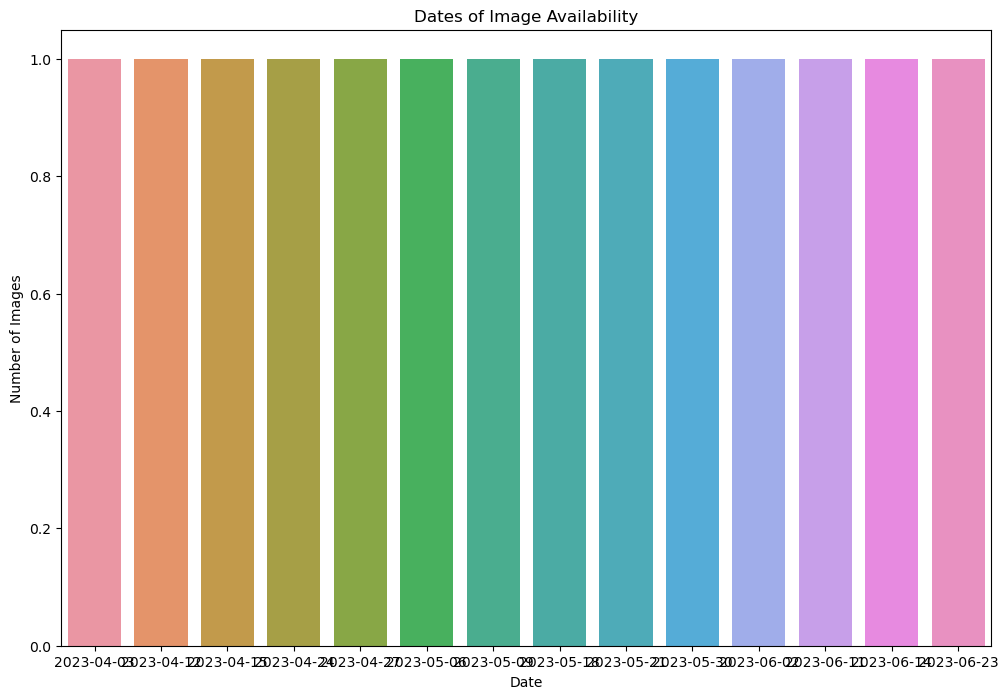

In [13]:
# Create a bar plot of the data.
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(data.keys()), y=list(data.values()),)

# Add a title to the plot.
plt.title("Dates of Image Availability")

# Add labels to the x-axis.
plt.xlabel("Date")

# Add labels to the y-axis.
plt.ylabel("Number of Images")

In [4]:
startDate = '2023-01-01'
endDate = '2023-04-01'
aoi = ee.Geometry.Polygon(
        [[[66.88941530162356, 24.924689000727422],
          [66.88941530162356, 24.760188615642406],
          [67.14484743052981, 24.760188615642406],
          [67.14484743052981, 24.924689000727422]]])

# Function to get dates for image collections
def get_dates(collection):
    """Generates a chart of the availability of images in a collection.

    Args:
        collection: The Earth Engine image collection.

    Returns:
        A dictionary of the availability of images in the collection.
    """

    # Get the list of all available dates.
    date_range = collection.reduceColumns(ee.Reducer.toList(), ["system:time_start"])
    date_range = date_range.values().get(0)

    # Convert the list of dates to a list of strings.
    date_range = ee.List(date_range).map(lambda n: ee.Date(n).format("YYYY-MM-dd"))

    # Create a frequency histogram of the available dates.
    availability_dict = date_range.reduce(ee.Reducer.frequencyHistogram())

    # Convert the frequency histogram to a dictionary.
    availability_dict = ee.Dictionary(availability_dict)

    return availability_dict.getInfo()


# Function to get dates for Sentinel-2
def get_sentinel1_dates():
    sentinel1_collection = ee.ImageCollection("COPERNICUS/S1_GRD")\
                            .filterDate(startDate, endDate)\
                                .filterBounds(aoi)
                                
    return get_dates(sentinel1_collection)

# Function to get dates for Sentinel-2 surface reflectance
def get_sentinel2_dates():
    sentinel2_collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
                            .filterDate(startDate, endDate)\
                                .filterBounds(aoi)
                                
    return get_dates(sentinel2_collection)


# Function to get dates for Landsat-8
def get_landsat8_dates():
    landsat8_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")\
                            .filterDate(startDate, endDate)\
                                .filterBounds(aoi)
    return get_dates(landsat8_collection)


# Function to get dates for Landsat-9
def get_landsat9_dates():
    landsat9_collection = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2")\
                            .filterDate(startDate, endDate)\
                                .filterBounds(aoi)
    return get_dates(landsat9_collection)


# Get dates for Sentinel-1
sentinel1_data = get_sentinel1_dates()

# Get dates for Sentinel-2
sentinel2_data = get_sentinel2_dates()

# Get dates for Landsat-8
landsat8_data = get_landsat8_dates()

# Get dates for Landsat-9
landsat9_data = get_landsat9_dates()


In [7]:
sentinel1_data

{'2023-01-06': 1,
 '2023-01-09': 1,
 '2023-01-18': 1,
 '2023-01-21': 1,
 '2023-01-30': 1,
 '2023-02-02': 1,
 '2023-02-11': 1,
 '2023-02-14': 1,
 '2023-02-23': 1,
 '2023-02-26': 1,
 '2023-03-07': 1,
 '2023-03-10': 1,
 '2023-03-19': 1,
 '2023-03-22': 1,
 '2023-03-31': 1}

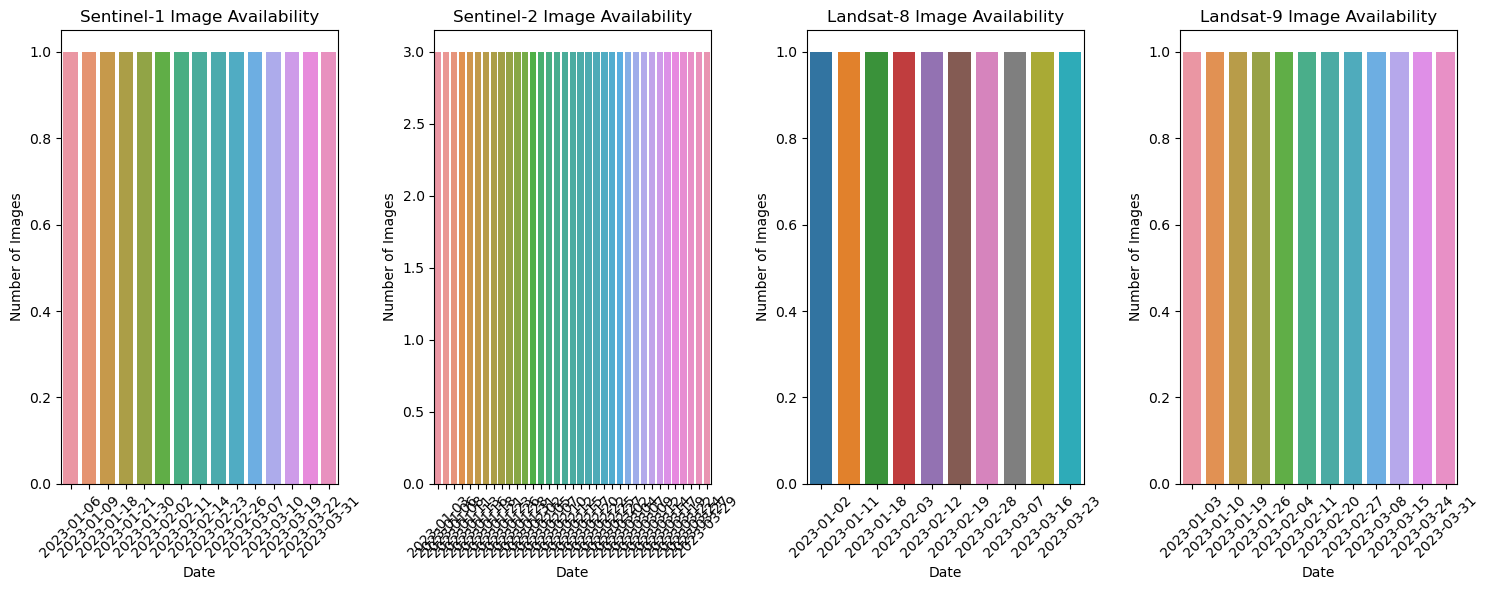

In [11]:

# Create a bar plot for each image collection
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
sns.barplot(x=list(sentinel1_data.keys()), y=list(sentinel1_data.values()))
plt.title("Sentinel-1 Image Availability")
plt.xlabel("Date")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
sns.barplot(x=list(sentinel2_data.keys()), y=list(sentinel2_data.values()))
plt.title("Sentinel-2 Image Availability")
plt.xlabel("Date")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)


plt.subplot(1, 4, 3)
sns.barplot(x=list(landsat8_data.keys()), y=list(landsat8_data.values()))
plt.title("Landsat-8 Image Availability")
plt.xlabel("Date")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
sns.barplot(x=list(landsat9_data.keys()), y=list(landsat9_data.values()))
plt.title("Landsat-9 Image Availability")
plt.xlabel("Date")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


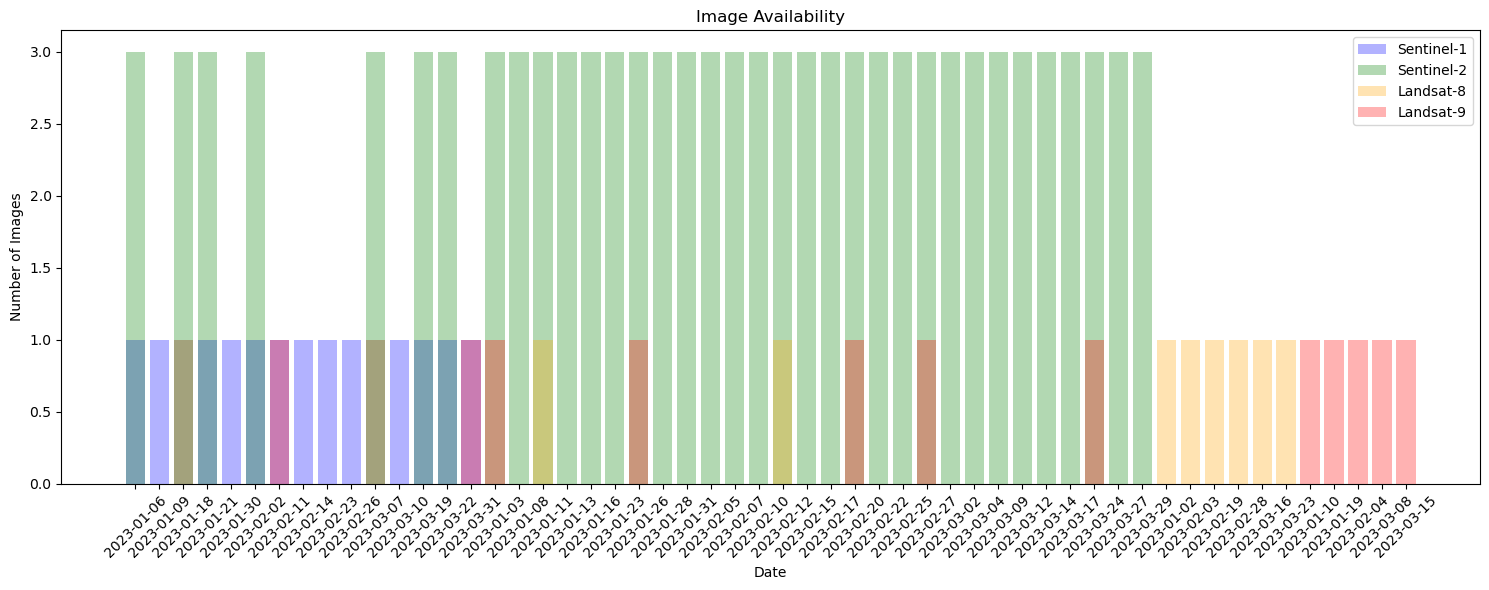

In [16]:
# Create a bar plot combining all image collections
plt.figure(figsize=(15, 6))

colors = ['blue', 'green', 'orange', 'red']
collection_names = ['Sentinel-1', 'Sentinel-2', 'Landsat-8', 'Landsat-9']
collections_data = [sentinel1_data, sentinel2_data, landsat8_data, landsat9_data]

for i in range(len(collection_names)):
    plt.bar(list(collections_data[i].keys()), list(collections_data[i].values()), color=colors[i], alpha=0.3, label=collection_names[i])

plt.title("Image Availability")
plt.xlabel("Date")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
